In [2]:
# import relevant libraries
import turicreate
import pandas as pd
%matplotlib inline

In [3]:
# SFrame to hold the training data
dataset = turicreate.SFrame('~/Desktop/ITSS4v95/train.csv')

Finished parsing file /Users/sharane/Desktop/ITSS4v95/train.csv

Parsing completed. Parsed 100 lines in 0.107099 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,float,float,str,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/sharane/Desktop/ITSS4v95/train.csv

Parsing completed. Parsed 17892 lines in 0.059969 secs.

In [4]:
# SFrame to hold the test data
test_dataset = turicreate.SFrame('~/Desktop/ITSS4v95/test.csv')

Finished parsing file /Users/sharane/Desktop/ITSS4v95/test.csv

Parsing completed. Parsed 100 lines in 0.057634 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 3847 lines. Lines per second: 78878.8

Finished parsing file /Users/sharane/Desktop/ITSS4v95/test.csv

Parsing completed. Parsed 12212 lines in 0.050182 secs.

In [5]:
# output the dataset
dataset

Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
1,,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
2,,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
3,,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
4,,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
5,,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0
6,,Afghanistan,33.0,65.0,2020-01-27,0.0,0.0
7,,Afghanistan,33.0,65.0,2020-01-28,0.0,0.0
8,,Afghanistan,33.0,65.0,2020-01-29,0.0,0.0
9,,Afghanistan,33.0,65.0,2020-01-30,0.0,0.0
10,,Afghanistan,33.0,65.0,2020-01-31,0.0,0.0


In [7]:
# split the training set into a new training and test data set
# 80% of the training set will remain in the training set; 20% will become the new test set
training_set, test_set = dataset.random_split(.8, seed = 0)

# fatalities_model is a linear regression model to predict the amount of fatalities based on confirmed cases
fatalities_model = turicreate.linear_regression.create(training_set, target = 'Fatalities', features = ['ConfirmedCases'])


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 13659

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.009670     | 3268.666561        | 1056.959039          | 59.066821                       | 56.217086                         |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [8]:
# evaluating the efficiency of the model by testing against the test set
print(fatalities_model.evaluate(test_set))

{'max_error': 3780.831845442234, 'rmse': 86.88530626541154}


In [9]:
# import another relevant library
import matplotlib.pyplot as plt

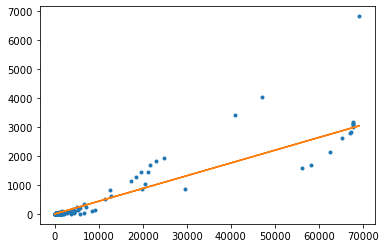

In [10]:
# plot the linear regression model to visualize the model
plt.plot(test_set['ConfirmedCases'], test_set['Fatalities'],'.', test_set['ConfirmedCases'], fatalities_model.predict(test_set), '-')


In [11]:
# passing in a very simple test set to see how well the model predicts fatalities based on inputted confirmed cases
testing = (1000, 5000, 19000)
print(fatalities_model.predict(turicreate.SFrame(testing)))

[10.426605168753152, 10.426605168753152, 10.426605168753152]


In [12]:
# determine the coefficients of the model
coefficients_model = fatalities_model.coefficients
print(coefficients_model)

+----------------+-------+---------------------+------------------------+
|      name      | index |        value        |         stderr         |
+----------------+-------+---------------------+------------------------+
|  (intercept)   |  None |  -2.97744514426417  |   0.5074881596189159   |
| ConfirmedCases |  None | 0.04397689371605802 | 0.00014959290704166466 |
+----------------+-------+---------------------+------------------------+
[2 rows x 4 columns]



In [49]:
# create a machine learning predictions model based on the fatalities model from above
predictions_model = fatalities_model.predict(test_set)

In [50]:
print(predictions_model)

[-3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -2.9877494709196717, -2.9877494709196717, -2.9877494709196717, -2.0564079063097034, -1.2581151366440166, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -1.5685623248473393, 1.5802591555006487, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -2.9877494709196717, -2.9877494709196717, -2.81035107766063, -2.2781558978835053, -2.1451071029392246, -2.1451071029392246, -0.637220760237371, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -2.9877494709196717, -0.6815703585521313, 2.8663975066287, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.032099069234432, -3.0320990

In [14]:
# results to evaluate the efficiency of the fatalities model
results_model = fatalities_model.evaluate(test_set)
print(results_model)

{'max_error': 3780.831845442234, 'rmse': 86.88530626541154}


In [15]:
# summary of the linear regression model
fatalities_model.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 2
Number of examples             : 13659
Number of feature columns      : 1
Number of unpacked features    : 1

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0115

Settings
--------
Residual sum of squares        : 47654738.8904
Training RMSE                  : 59.0668

Highest Positive Coefficients
-----------------------------
ConfirmedCases                 : 0.044

Lowest Negative Coefficients
----------------------------
(intercept)                    : -2.9774

